In [595]:
#Importing the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [596]:
#Opening Train Data
train_data = pd.read_csv("Data/Titanic-Data/train.csv")
train_data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [597]:
#Opening Test Data
test_data = pd.read_csv("Data/Titanic-Data/test.csv")
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [598]:
#Combining the dataframes so that we can do similar oprations on both at the same time
combine = [train_data,test_data]

In [599]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [600]:
#Printing the train and test Data info

print("="*40)
print("For Train Data")
print("="*40)
train_data.info()

print("="*40)
print("For Test Data")
print("="*40)
test_data.info()

For Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
For Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [601]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [602]:
#Number of unique data 
train_data.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [603]:
train_data.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Caldwell, Master. Alden Gates",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [604]:
train_data[train_data["Sex"]=="male"].count()

# Findings:
#Total passenger = 891
#Male Passenger = 577
#Female Passenger =891-577 = 314
#Percentage of Male Passenger = 64.5%
# Percentage of Female Passenger =35.24%

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

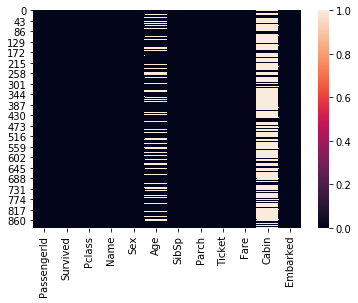

In [605]:
#To check the null values

sns.heatmap(train_data.isnull())

In [606]:
#Let's fulfill the Age Column By taking average age from each Class
train_data["Age"].mean()
#Average age all total = 29.69

train_data[(train_data["Pclass"]==1)].describe()
# #Average age of pclass-1 is 38.23
train_data[(train_data["Pclass"]==2)].describe()
# #Average age of pclass-1 is 29.8
train_data[(train_data["Pclass"]==3)].describe()
# #Average age of pclass-1 is 25.8


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


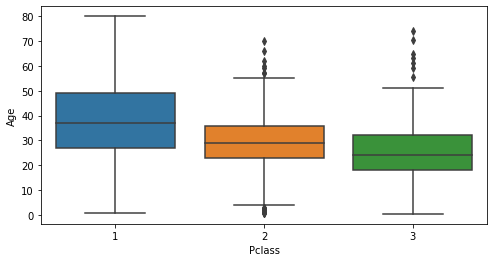

In [607]:
plt.figure (figsize=(8,4))
sns.boxplot(x="Pclass",y="Age",data=train_data)


In [608]:
# A function to hold the average age of the passengers of each class in train data 
def avg_age_train(i):
    
    Age = i[0]
    Pclass = i[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38.23
        elif Pclass==2:
            return 29.8
        else:
            return 25.8
    else:
        return Age

In [609]:
#Applying the function in the Age column
train_data["Age"]= train_data[["Age","Pclass"]].apply(avg_age_train,axis=1)

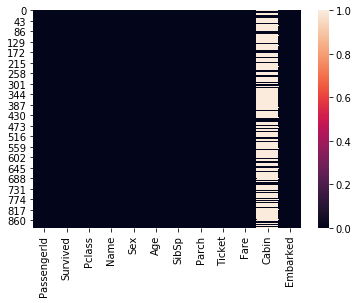

In [610]:
# No null values in the Age column of the train data
sns.heatmap(train_data.isnull())

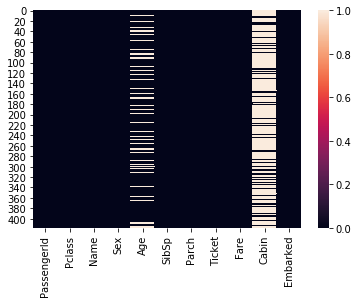

In [611]:
# Performing the similar operation in the test data
sns.heatmap(test_data.isnull())

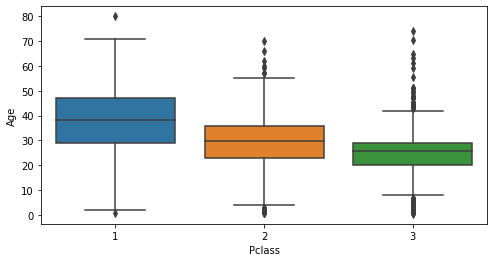

In [612]:
plt.figure (figsize=(8,4))
sns.boxplot(x="Pclass",y="Age",data=train_data)


In [613]:
#Let's fulfill the Age Column By taking average age from each Class in TEST data
test_data["Age"].mean()
#Average age all total = 30.27

test_data[(test_data["Pclass"]==1)].describe()
# # #Average age of pclass-1 is 40.91
test_data[(test_data["Pclass"]==2)].describe()
# # #Average age of pclass-1 is 28.77
test_data[(test_data["Pclass"]==3)].describe()
# # #Average age of pclass-1 is 24.02


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,218.000000,218.0,146.000000,218.000000,218.000000,217.000000
mean,1094.178899,3.0,24.027945,0.463303,0.417431,12.459678
std,120.188830,0.0,10.537105,1.107591,1.165980,10.803698
min,892.000000,3.0,0.170000,0.000000,0.000000,3.170800
25%,994.250000,3.0,18.500000,0.000000,0.000000,7.750000
50%,1091.500000,3.0,24.000000,0.000000,0.000000,7.895800
75%,1191.750000,3.0,29.750000,1.000000,0.000000,14.400000
max,1309.000000,3.0,60.500000,8.000000,9.000000,69.550000


In [614]:
def avg_age_test(i):
    
    Age = i[0]
    Pclass = i[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 40.91
        elif Pclass==2:
            return 28.77
        else:
            return 24.02
    else:
        return Age

In [615]:
test_data["Age"]=test_data[["Age","Pclass"]].apply(avg_age_test,axis=1)

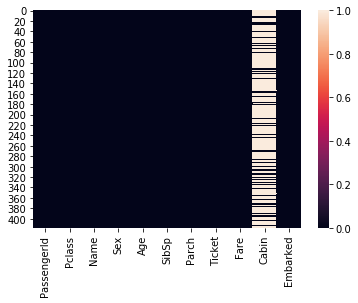

In [616]:
sns.heatmap(test_data.isnull())

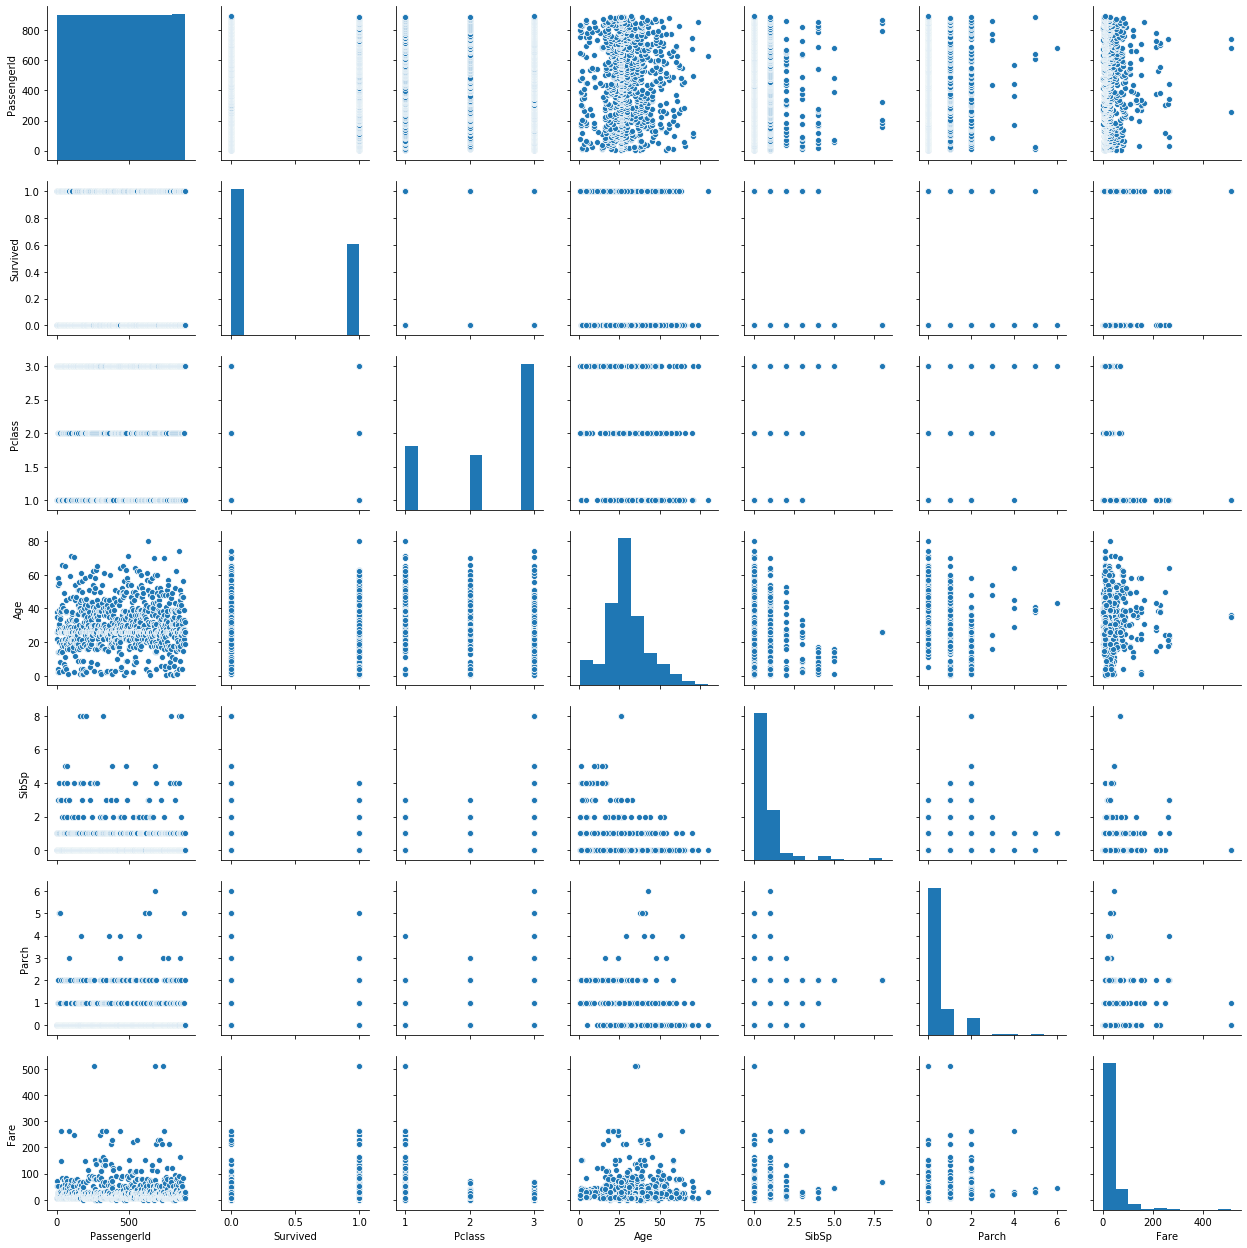

In [617]:
sns.pairplot(train_data)

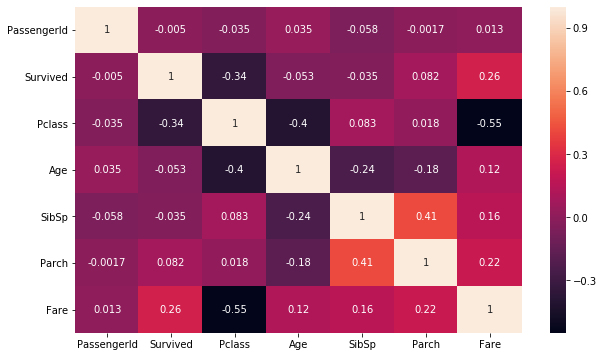

In [618]:
# Correalation between the columns
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True)


In [619]:
#Time to find some correlations
# Between Pclass and survived
train_data[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [620]:
# Between SibSp and Survived

train_data[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [621]:
#Between Sex and Survived
train_data[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [622]:
# Between Parched and survived
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [623]:
#Between Embarked and Survived
train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


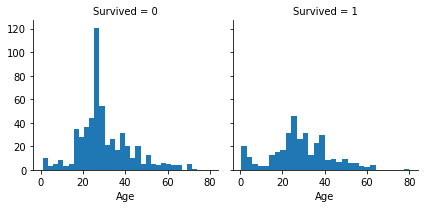

In [624]:
# Visializing the Data

sns.FacetGrid(train_data,col="Survived").map(plt.hist,"Age",bins=30)

C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


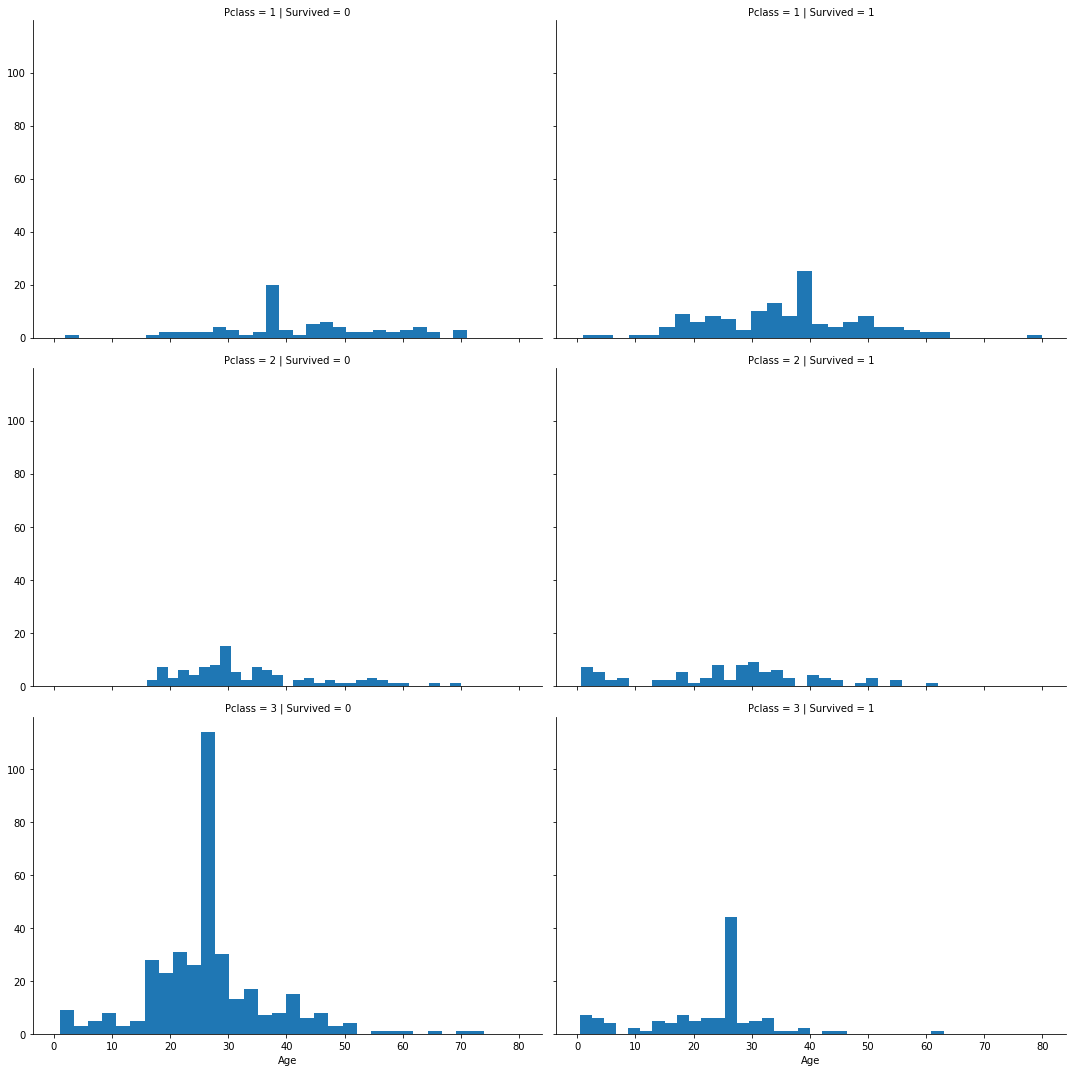

In [625]:
# Survived and Pclass numbers based on Age
sns.FacetGrid(train_data,col="Survived",row="Pclass",size=5, aspect=1.5).map(plt.hist,"Age",bins=30)

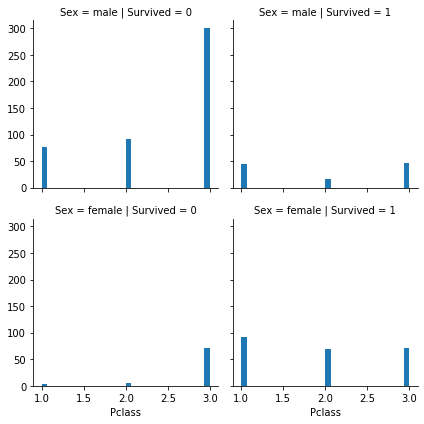

In [626]:
# Sex and Survived based on Pclass
sns.FacetGrid(train_data,col="Survived",row="Sex").map(plt.hist,"Pclass",bins=30)
#Female Passengers had much more survival rate

In [627]:
#Now let's correalte the categorical features 

In [628]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


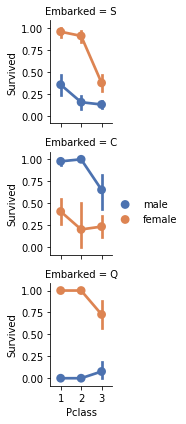

In [629]:
#Visialization of Survived people based on PClass and Sex where Embarked were S, C and Q
sns.FacetGrid(train_data,row="Embarked",size=2,aspect=1).map(sns.pointplot,"Pclass",'Survived', 'Sex',palette='deep').add_legend()

#In Embarked C, Male passengers survived more. Especially male passengers of Pclass 2
#Overall Female passengers survived more.

C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


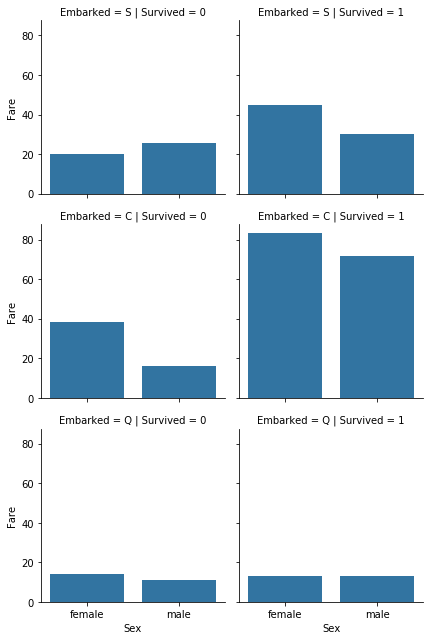

In [630]:
sns.FacetGrid(train_data,row="Embarked", col="Survived").map(sns.barplot,"Sex","Fare",ci=None).add_legend()

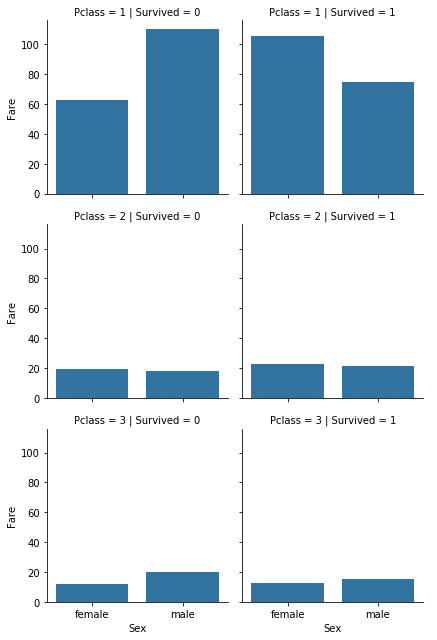

In [631]:
sns.FacetGrid(train_data,col="Survived",row="Pclass").map(sns.barplot,"Sex","Fare",ci=None).add_legend()

In [632]:
# So Cabin and the Ticket feature is basically not being so valuable. SO let's drop them 


print("Before", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data= test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_data, test_data]

"After", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape


Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [633]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


In [634]:
test_data.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q


In [635]:
# Ok so now we can create new features from the existing ones.
# Let's try to extract the first word that ends with a "dot". that would be the titles that I would plot against Survival

for i in combine:
    i["Title"]= i.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [636]:
for i in combine:
    i['Title'] = i['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Major','Dr', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
    i['Title']= i['Title'].replace(['Mlle'],'Miss') #Mlle is Mademoiselle which means miss
    i['Title'] = i["Title"].replace(['Mme'],"Mrs") #Mme is short for Madame in French
    i['Title']= i["Title"].replace(["Ms"],"Miss")



In [637]:
#Check if there is any correlation 

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


In [638]:
#Now we need to convert them into a numerical value
# title_dict= {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}

# for i in combine:
#     i["Title"] = i["Title"].map(title_dict)
#     i["Title"] = i["Title"].fillna(0)

title_dict = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
for i in combine:
    i['Title'] = i['Title'].map(title_dict)
    i['Title'] = i['Title'].fillna(0)
    

In [639]:
train_data.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,25.8,0,0,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3


In [640]:
test_data.head(11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.50,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,12.2875,S,3
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,9.2250,S,1
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,7.6292,Q,2
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,29.0000,S,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,7.2292,C,3
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,24.1500,S,1


In [641]:
print(train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

(891, 11) (418, 10) (891, 11) (418, 10)


In [642]:
# Creating Dummy variables for both Train and Test dataset

In [643]:
#Train_Data
Sex_dummies_train = pd.get_dummies(train_data["Sex"],drop_first=True)
Embarked_dummies_train = pd.get_dummies(train_data["Embarked"],drop_first=True)

In [644]:

train_data.drop(["Sex","Embarked"],axis=1,inplace=True)


In [645]:
train_data = pd.concat([train_data,Sex_dummies_train,Embarked_dummies_train],axis=1)

In [646]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Title,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.25,1,1,0,1


In [647]:
train_data.shape

(891, 12)

In [648]:
#Test_Data

test_data.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1


In [649]:
#Test_Data
Sex_dummies_test = pd.get_dummies(test_data["Sex"],drop_first=True)
Embarked_dummies_test = pd.get_dummies(test_data["Embarked"],drop_first=True)

In [650]:

test_data.drop(["Sex","Embarked"],axis=1,inplace=True)

In [651]:
test_data = pd.concat([test_data,Sex_dummies_test,Embarked_dummies_test],axis=1)

In [652]:
test_data.head(1)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Title,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,1,1,0


In [653]:
test_data.shape

(418, 11)

In [654]:
combine = [train_data,test_data]

In [655]:
combine[1].shape

(418, 11)

In [656]:
# Creating new features combining the existing One.

In [657]:
#Siblings-spouse and Parent-Children can be combined to make one family 

In [658]:
for i in combine:
    i['FamilyMembers'] = i["SibSp"] + i["Parch"] +1 #+1 counting the person itself

In [659]:
train_data.head(22)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Title,male,Q,S,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,1,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,3,0,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,2,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,3,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,1,0,1,1
5,6,0,3,"Moran, Mr. James",25.8,0,0,8.4583,1,1,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,1,1,0,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,21.0750,4,1,0,1,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,11.1333,3,0,0,1,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,30.0708,3,0,0,0,2


In [660]:
#Check the correlation between survived and family size

train_data[["FamilyMembers","Survived"]].groupby(["FamilyMembers"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,FamilyMembers,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [661]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Title,male,Q,S,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,1,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,3,0,0,0,2


In [662]:
test_data.head(2)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Title,male,Q,S,FamilyMembers
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,1,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,3,0,0,1,2


In [663]:
# Discretize Fare column into equal-sized buckets based on rank 
train_data['FareQuantile'] = pd.qcut(train_data['Fare'], 4)


In [664]:
# Correaltion between FareQuantile and Survived
train_data[['FareQuantile', 'Survived']].groupby(['FareQuantile'], as_index=False).mean().sort_values(by='FareQuantile', ascending=True)

,FareQuantile,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [665]:
#There's an opportunity to convert the FareQuantile into an ordinal value and we can drop Fare column later on

for i in combine:
    i.loc[i['Fare'] <= 7.91, 'Fare'] = 0
    i.loc[(i['Fare'] > 7.91) & (i['Fare'] <= 14.454), 'Fare'] = 1
    i.loc[(i['Fare'] > 14.454) & (i['Fare'] <= 31), 'Fare']   = 2
    i.loc[ i['Fare'] > 31, 'Fare'] = 3
    i['Fare'] = i['Fare'].fillna(0).astype(int)

train_data = train_data.drop(['FareQuantile'], axis=1)
combine = [train_data, test_data]
    
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Title,male,Q,S,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,0,1,1,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,3,3,0,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,1,2,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,3,3,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,1,1,1,0,1,1
5,6,0,3,"Moran, Mr. James",25.8,0,0,1,1,1,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,3,1,1,0,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,2,4,1,0,1,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,1,3,0,0,1,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,2,3,0,0,0,2


In [666]:
train_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Name"],axis=1,inplace=True)


In [667]:
combine = [train_data,test_data]

In [668]:
train_data.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,FamilyMembers
0,1,0,3,22.0,1,0,0,1,1,0,1,2
1,2,1,1,38.0,1,0,3,3,0,0,0,2


In [669]:
test_data.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,FamilyMembers
0,892,3,34.5,0,0,0,1,1,1,0,1
1,893,3,47.0,1,0,0,3,0,0,1,2


In [670]:
print("Final shape of the dataframes")
print("Train Data: ",train_data.shape)
print("Test Data: ",test_data.shape)
print("Combine[0]: ",combine[0].shape)
print("Combine[1]: ",combine[1].shape)


Final shape of the dataframes
Train Data:  (891, 12)
Test Data:  (418, 11)
Combine[0]:  (891, 12)
Combine[1]:  (418, 11)


In [671]:
# We have got our final share of features. It is now time to choose the models to evaluate result

In [672]:
 
# This is a classification and regression problem. Here we are trying to classify whether the passenger survived or not 
# based on the relationship with the engineered features. Hence we can try algorithms such as KNN, Logistic Regression, SVM,
# Random Forest, Desicion Tree, Artificial Neural network etc. Let's try these algorithms and compare the results.


In [673]:
# Importing tentative models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [674]:
# USING RANDOM FOREST

In [675]:
from sklearn.model_selection import train_test_split
X = train_data.drop(["Survived","PassengerId"],axis=1)
y = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

X_train.shape, y_train.shape, X_test.shape

((712, 10), (712,), (179, 10))

In [676]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [677]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf.score(X_train, y_train)

#Accuracy Score
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Accuracy Score: ",rf_accuracy)


#Confidence Score

confidence_rf= round(rf.score(X_train, y_train) * 100, 2)
print("Confidence Score: ",confidence_rf)


#Confusion Matrix and Classification Report

print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

Accuracy Score:  0.8212290502793296
Confidence Score:  85.11
[[93 10]
 [22 54]]


              precision    recall  f1-score   support

           0       0.81      0.90      0.85       103
           1       0.84      0.71      0.77        76

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [678]:
# K Nearest Neighbors

In [679]:
knn = KNeighborsClassifier(n_neighbors=1) #Will later on change the value of K based on the error rate plot

In [680]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[84 19]
 [24 52]]


              precision    recall  f1-score   support

           0       0.78      0.82      0.80       103
           1       0.73      0.68      0.71        76

    accuracy                           0.76       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [681]:
#To find the K value with maximum accuracy

In [682]:
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

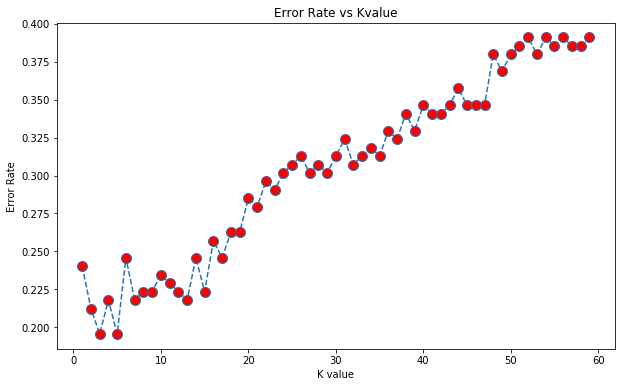

In [683]:
plt.figure(figsize=(10,6))

plt.plot(range(1,60),error_rate, linestyle="--",marker='o',markersize=10,markerfacecolor='red')
plt.title("Error Rate vs Kvalue")
plt.xlabel("K value")
plt.ylabel("Error Rate")

In [684]:
#From the plot, if we take the value of K=3, we can increase the accuracy rate.


In [685]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('WITH K=3')
print('\n')

#Accuracy Rate
knn_accuracy = accuracy_score(y_test,knn_pred)
print("Accuracy: ",knn_accuracy)
print('\n')

#Confidence Score
knn.score(X_train, y_train)
confidence_knn = round(knn.score(X_train, y_train) * 100, 2)
print("confidence score: ",confidence_knn)

#Confusion Matrix and CLassification report
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=3


Accuracy:  0.8044692737430168


confidence score:  88.62
[[89 14]
 [21 55]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       103
           1       0.80      0.72      0.76        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [686]:
#Logistic Regression

In [687]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

#Accuracy Score

lr_accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy: ",lr_accuracy)
print("\n")

#Confidence Score
lr.score(X_train, y_train)
confidence_lr = round(lr.score(X_train, y_train)* 100,2)
print("Confidence Score: ",confidence_lr)
print("\n")

#Confusion Matrix and CLassification report

print("Confusion Matrix: ")
print(confusion_matrix(y_test,lr_pred))
print("\n")
print("Classification Report")
print(classification_report(y_test,lr_pred))

Accuracy:  0.7988826815642458


Confidence Score:  82.3


Confusion Matrix: 
[[90 13]
 [23 53]]


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       103
           1       0.80      0.70      0.75        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [688]:
#Support Vector Machine

In [689]:
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

#Accuracy Score

svm_accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy: ",svm_accuracy)
print("\n")

#Confidence Score
svm.score(X_train, y_train)
confidence_svm = round(svm.score(X_train, y_train)* 100,2)
print("Confidence Score: ",confidence_svm)
print("\n")

#Confusion Matrix and CLassification report

print("Confusion Matrix: ")
print(confusion_matrix(y_test,svm_pred))
print("\n")
print("Classification Report")
print(classification_report(y_test,svm_pred))

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  0.7877094972067039


Confidence Score:  88.2


Confusion Matrix: 
[[93 10]
 [28 48]]


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       103
           1       0.83      0.63      0.72        76

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



In [690]:
#Perceptron

In [691]:
perceptron = Perceptron()
perceptron.fit(X_train,y_train)
perceptron_pred = perceptron.predict(X_test)

#Accuracy Score

perceptron_accuracy = accuracy_score(y_test, perceptron_pred)
print("Accuracy: ",perceptron_accuracy)
print("\n")

#Confidence Score
perceptron.score(X_train, y_train)
confidence_perceptron = round(perceptron.score(X_train, y_train)* 100,2)
print("Confidence Score: ",confidence_perceptron)
print("\n")

#Confusion Matrix and CLassification report

print("Confusion Matrix: ")
print(confusion_matrix(y_test,perceptron_pred))
print("\n")
print("Classification Report")
print(classification_report(y_test,perceptron_pred))

Accuracy:  0.6145251396648045


Confidence Score:  69.24


Confusion Matrix: 
[[101   2]
 [ 67   9]]


Classification Report
              precision    recall  f1-score   support

           0       0.60      0.98      0.75       103
           1       0.82      0.12      0.21        76

    accuracy                           0.61       179
   macro avg       0.71      0.55      0.48       179
weighted avg       0.69      0.61      0.52       179



In [692]:
#Decision Tree

In [693]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

dt.score(X_train, y_train)

#Accuracy Score

dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy: ",dt_accuracy)
print("\n")

#Confidence Score
confidence_dt = round(dt.score(X_train, y_train)* 100,2)
print("Confidence Score: ",confidence_dt)
print("\n")

#Confusion Matrix and CLassification report

print("Confusion Matrix: ")
print(confusion_matrix(y_test,dt_pred))
print("\n")
print("Classification Report")
print(classification_report(y_test,dt_pred))

Accuracy:  0.8044692737430168


Confidence Score:  96.21


Confusion Matrix: 
[[92 11]
 [24 52]]


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       103
           1       0.83      0.68      0.75        76

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [694]:
#Gausian Naive Bayes

In [695]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

gnb.score(X_train, y_train)

#Accuracy Score

gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Accuracy: ",gnb_accuracy)
print("\n")

#Confidence Score
confidence_gnb = round(gnb.score(X_train, y_train)* 100,2)
print("Confidence Score: ",confidence_gnb)
print("\n")

#Confusion Matrix and CLassification report

print("Confusion Matrix: ")
print(confusion_matrix(y_test,gnb_pred))
print("\n")
print("Classification Report")
print(classification_report(y_test,gnb_pred))

Accuracy:  0.8100558659217877


Confidence Score:  78.79


Confusion Matrix: 
[[86 17]
 [17 59]]


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.78      0.78      0.78        76

    accuracy                           0.81       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179



In [696]:
#Linear svc

In [697]:
lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
lsvc_pred = lsvc.predict(X_test)

lsvc.score(X_train, y_train)

#Accuracy Score

lsvc_accuracy = accuracy_score(y_test, lsvc_pred)
print("Accuracy: ",lsvc_accuracy)
print("\n")

#Confidence Score
confidence_lsvc = round(lsvc.score(X_train, y_train)* 100,2)
print("Confidence Score: ",confidence_lsvc)
print("\n")

#Confusion Matrix and CLassification report

print("Confusion Matrix: ")
print(confusion_matrix(y_test,lsvc_pred))
print("\n")
print("Classification Report")
print(classification_report(y_test,lsvc_pred))

Accuracy:  0.8100558659217877


Confidence Score:  82.72


Confusion Matrix: 
[[91 12]
 [22 54]]


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       103
           1       0.82      0.71      0.76        76

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [698]:
#Comparisons

In [699]:
models = pd.DataFrame({
    'Model': ["Random Forest","KNN","Logistic Regression","Support Vector Machine","Perceptron","Decision Tree","Gausian Naive Bayes","Linear SVC"],
    'Accuracy_Score': [rf_accuracy,knn_accuracy,lr_accuracy,svm_accuracy,perceptron_accuracy,dt_accuracy,gnb_accuracy,lsvc_accuracy],
    'Confidence_Score': [confidence_rf, confidence_knn, confidence_lr,confidence_svm,confidence_perceptron,confidence_dt,confidence_gnb,confidence_lsvc]})
models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score,Confidence_Score
0,Random Forest,0.821229,85.11
6,Gausian Naive Bayes,0.810056,78.79
7,Linear SVC,0.810056,82.72
1,KNN,0.804469,88.62
5,Decision Tree,0.804469,96.21
2,Logistic Regression,0.798883,82.30
3,Support Vector Machine,0.787709,88.20
4,Perceptron,0.614525,69.24
